In [1]:
import pandas as pd
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [2]:
np.random.seed(33)
random.seed(33)

# Pre-process data

In [3]:
df = pd.read_csv("./diabetes.csv")

In [4]:
X = df.drop(columns=["class"])

y = df["class"]
y = y.apply(lambda x: 0 if x == 'tested_negative' else 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Model Evaluation

In [6]:
def plot_roc_curve(clf, y_pred):
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Taxa de Falsos Positivos')
  plt.ylabel('Taxa de Verdadeiros Positivos')
  plt.title('Curva ROC')
  plt.legend(loc="lower right")
  plt.show()

  return roc_auc

In [7]:
results = []

# Logistic Regression

In [8]:
clf_lr = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
y_pred = clf_lr.predict(X_test)
precision = precision_score(y_test, y_pred, pos_label=1)
print(f"A precisão do modelo foi: {precision}")

A precisão do modelo foi: 0.7446808510638298


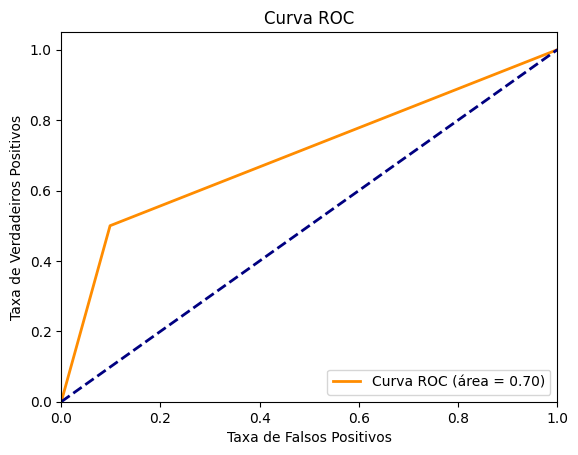

In [10]:
auc_roc = plot_roc_curve(clf_lr, y_pred)

In [11]:
item = {
    "model": str(clf_lr),
    "precision": precision,
    "auc_roc": auc_roc
}

results.append(item)

# Naive Bayes

In [12]:
clf_nb = GaussianNB().fit(X_train, y_train)

In [13]:
y_pred = clf_nb.predict(X_test)
precision = precision_score(y_test, y_pred, pos_label=1)
print(f"A precisão do modelo foi: {precision}")

A precisão do modelo foi: 0.6415094339622641


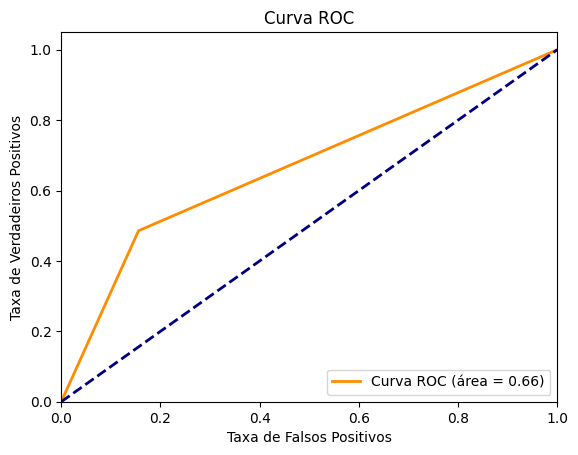

In [14]:
auc_roc = plot_roc_curve(clf_nb, y_pred)

In [15]:
item = {
    "model": str(clf_nb),
    "precision": precision,
    "auc_roc": auc_roc
}

results.append(item)

# KNN


In [16]:
clf_knn = KNeighborsClassifier().fit(X_train, y_train)

In [17]:
y_pred = clf_knn.predict(X_test)
precision = precision_score(y_test, y_pred, pos_label=1)
print(f"A precisão do modelo foi: {precision}")

A precisão do modelo foi: 0.64


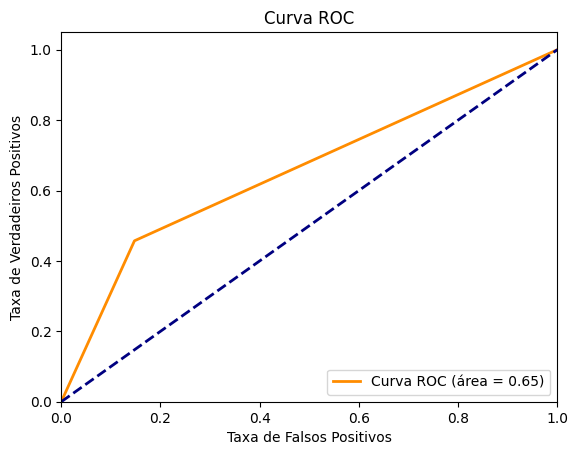

In [18]:
auc_roc = plot_roc_curve(clf_knn, y_pred)

In [19]:
item = {
    "model": str(clf_knn),
    "precision": precision,
    "auc_roc": auc_roc
}

results.append(item)

# Support Vector Machine

In [20]:
clf_svm = svm.SVC().fit(X_train, y_train)

In [21]:
y_pred = clf_svm.predict(X_test)
precision = precision_score(y_test, y_pred, pos_label=1)
print(f"A precisão do modelo foi: {precision}")

A precisão do modelo foi: 0.7045454545454546


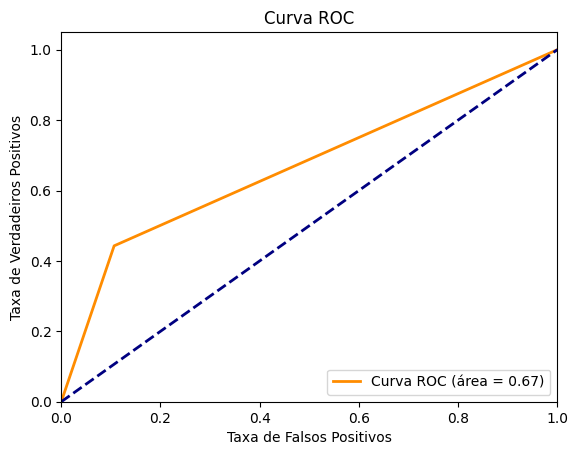

In [22]:
auc_roc = plot_roc_curve(clf_svm, y_pred)

In [23]:
pd.DataFrame(results)

,model,precision,auc_roc
0,LogisticRegression(),0.744681,0.700820
1,GaussianNB(),0.641509,0.664988
2,KNeighborsClassifier(),0.640000,0.654801
